In [1]:
import numpy as np 
import torch

import datasets.mnist as mnist
import datasets.cifar10 as cifar10
import constants
import metrics
from configuration import Configuration

from util import *

In [2]:
checkpointed_args = '/scratch/gp491/wandb/checkpoints/run-20210514_153059-ehhuqmwl/args.json'
checkpointed_model = '/scratch/gp491/wandb/checkpoints/run-20210514_153059-ehhuqmwl/epoch_5.pth'

model_args = Configuration.from_json(checkpointed_args)
trainer = get_trainer(model_args, device='cpu')
trainer.load_checkpoint(checkpointed_model)

metric_dict = {'NLL': lambda p, g: metrics.basic_cross_entropy(p, g).item(), 
                'ECE': metrics.wrap_ece(bins=20), 
                'Brier': metrics.wrap_brier()}

In [10]:
test_loader = mnist.get_test_loader(model_args.data_dir, model_args.batch_size, corrupted=True, intensity=0, corruption='rotation')
thresholds = np.linspace(0, 1, 50)
entropy_bins = np.linspace(-1, 2.5, 100)
acc, metric_res, thresholded_accuracies, thresholded_counts, binned_entropies = trainer.test(test_loader=test_loader, metric_dict=metric_dict, confidence_thresholds=thresholds, entropy_bins=entropy_bins)

  0%|          | 0/79 [00:00<?, ?batch/s]
Testing
/homes/gp491/deepens/proj-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/gp491/deepens/proj-env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/homes/gp491/deepens/proj-env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/homes/gp491/deepens/metrics.py:200: UserWarning: Warning: converting a masked element to nan.
  accuracies[i] = np.ma.masked_array(eq, mask=~mask).mean(-1)
100%|██████████| 79/79 [00:00<00:00, 98.11batch/s] Results: 
Accuracy: 0.9478
NLL: 0.17745286818742753
ECE: 0.05820644199997187
Brier: 0.07951348495483399



In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy on examples with $p(y|x) \\geq \\tau$')

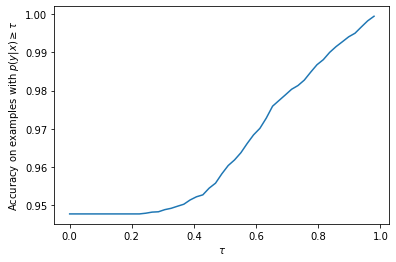

In [12]:
plt.plot(thresholds, thresholded_accuracies)
plt.xlabel(r'$\tau$')
plt.ylabel(r'Accuracy on examples with $p(y|x) \geq \tau$')

Text(0, 0.5, 'Count of examples with $p(y|x) \\geq \\tau$')

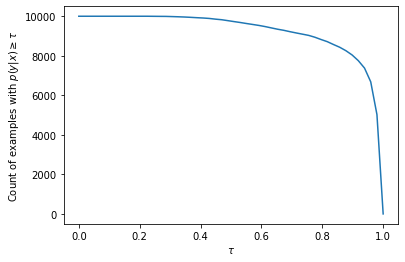

In [13]:
plt.plot(thresholds, thresholded_counts)
plt.xlabel(r'$\tau$')
plt.ylabel(r'Count of examples with $p(y|x) \geq \tau$')

Text(0, 0.5, 'Count')

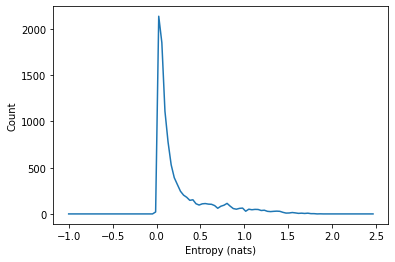

In [14]:
plt.plot(entropy_bins[:-1], binned_entropies)
plt.xlabel(r'Entropy (nats)')
plt.ylabel(r'Count')

In [16]:
type(trainer)

methods.SingleNetwork.SingleNetwork